In [1]:
# Đoạn code Python để hiển thị file ảnh pnm ở notebook
# Ví dụ để hiển thị file "img.pnm", ở dòng cuối của code cell
# bạn gõ (không cần dấu ! đằng trước): show_pnm('img.pnm')
# LƯU Ý: bạn phải chạy cell này một lần thì mới gọi được hàm show_pnm
from PIL import Image
from IPython.display import display
import numpy as np
def show_pnm(file_name):
  with open(file_name, 'r') as f:
    vals = f.read().split()
  w = int(vals[1])
  h = int(vals[2])
  if vals[0] == 'P2': # Grayscale
    pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w))
  elif vals[0] == 'P3': # RGB
    pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w, 3))
  else:
    return None
  
  return Image.fromarray(pixels)

# Đoạn code Python để hiển thị file chứa ma trận ở notebook
# (một dòng của ma trận ứng với một dòng trong file, 
# các phần tử trên mỗi dòng được cách nhau bởi khoảng trắng) 
# Ví dụ để hiển thị file "pixel_importance.txt", ở dòng cuối của code cell
# bạn gõ: show_matrix('pixel_important.txt')
def show_matrix(matrix_file):
  m = np.loadtxt(matrix_file)
  m = m + m.min()
  m = m / m.max()
  m = m * 255
  m = m.astype(np.uint8)
  return Image.fromarray(m)

In [2]:
image = 'castle' # Change image name here (not include extension part)
!make host1

nvcc support.cu host1.cu -o host1
support.cu
host1.cu
   Creating library host1.lib and object host1.exp
host1 images/castle.pnm 500
**********GPU info**********
Name: NVIDIA GeForce RTX 3060 Laptop GPU
Compute capability: 8.6
Num SMs: 30
Max num threads per SM: 1536
Max num warps per SM: 48
GMEM: 6441926656 byte
SMEM per SM: 102400 byte
SMEM per block: 49152 byte
****************************
Image size (width x height): 1428 x 968

Time: 57820.344 ms


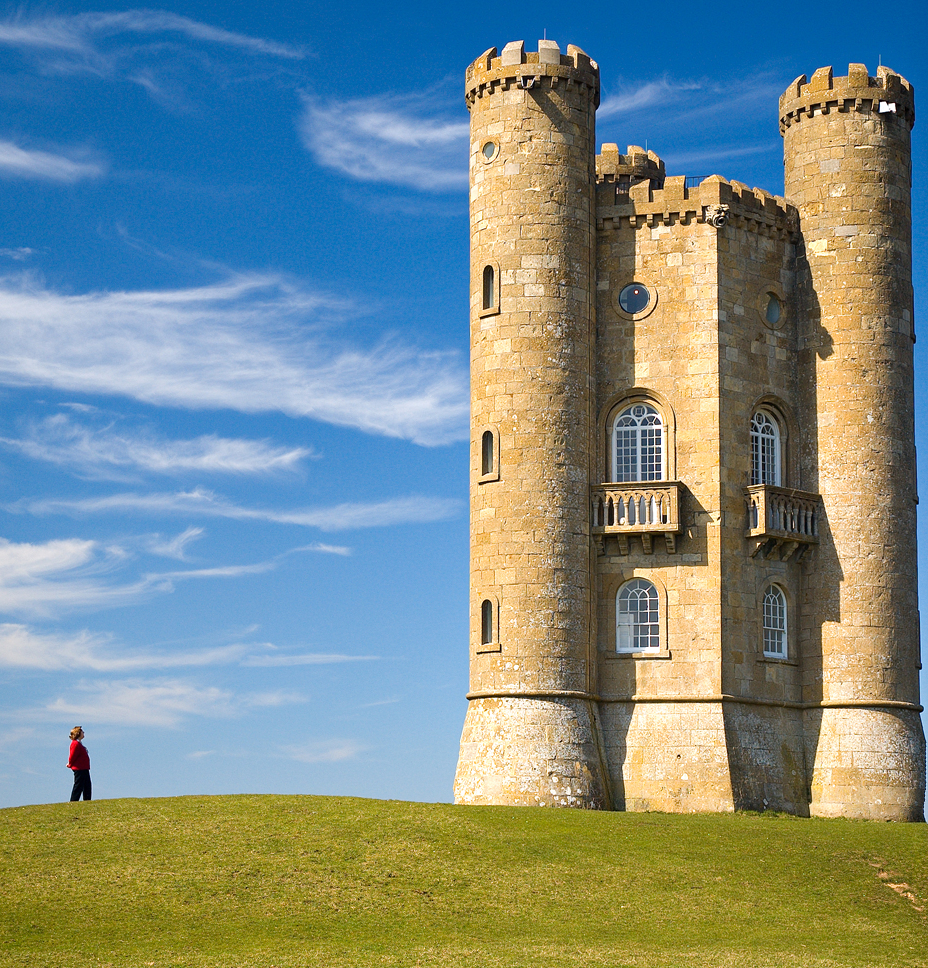

In [3]:
show_pnm(f'./images/{image}_host1.pnm')

In [4]:
!make device1

nvcc support.cu device1.cu -o device1
support.cu
device1.cu
   Creating library device1.lib and object device1.exp
device1 images/castle.pnm 500
**********GPU info**********
Name: NVIDIA GeForce RTX 3060 Laptop GPU
Compute capability: 8.6
Num SMs: 30
Max num threads per SM: 1536
Max num warps per SM: 48
GMEM: 6441926656 byte
SMEM per SM: 102400 byte
SMEM per block: 49152 byte
****************************
Image size (width x height): 1428 x 968

Time: 2572.496 ms


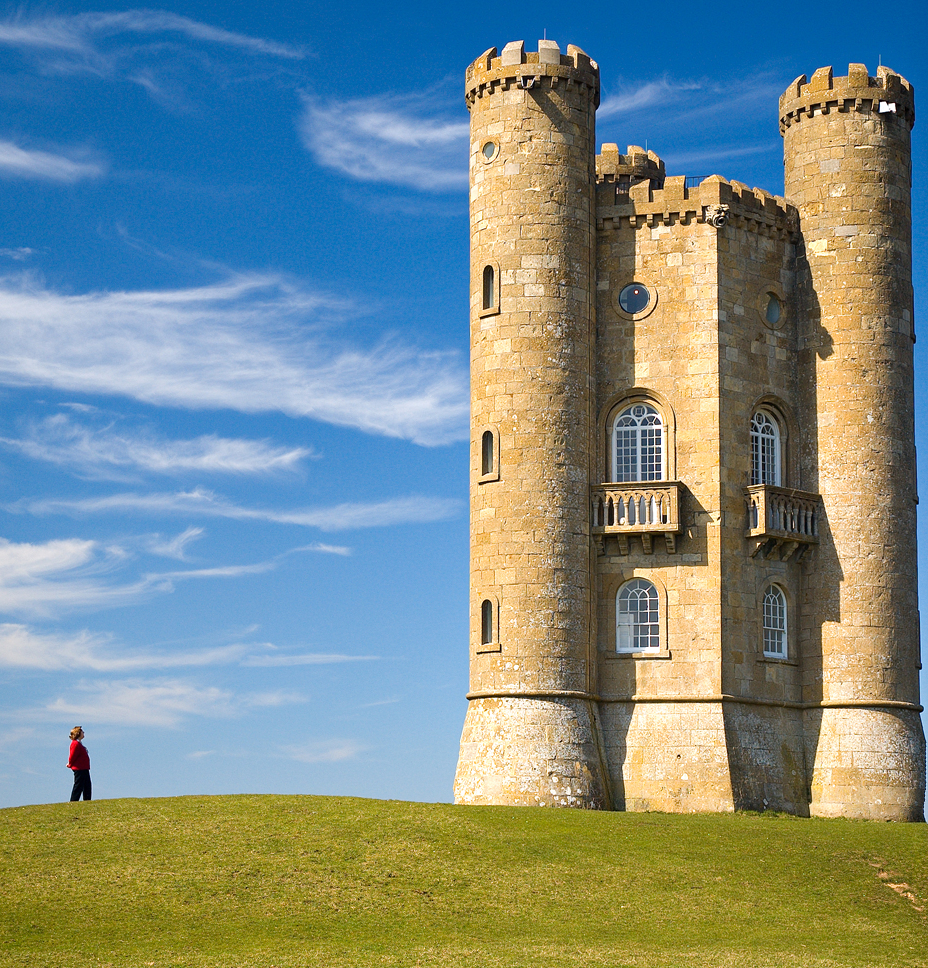

In [5]:
show_pnm(f'./images/{image}_device1.pnm')

In [6]:
!make device2

nvcc support.cu device2.cu -o device2
support.cu
device2.cu
   Creating library device2.lib and object device2.exp
device2 images/castle.pnm 500
**********GPU info**********
Name: NVIDIA GeForce RTX 3060 Laptop GPU
Compute capability: 8.6
Num SMs: 30
Max num threads per SM: 1536
Max num warps per SM: 48
GMEM: 6441926656 byte
SMEM per SM: 102400 byte
SMEM per block: 49152 byte
****************************
Image size (width x height): 1428 x 968

Time: 2571.418 ms


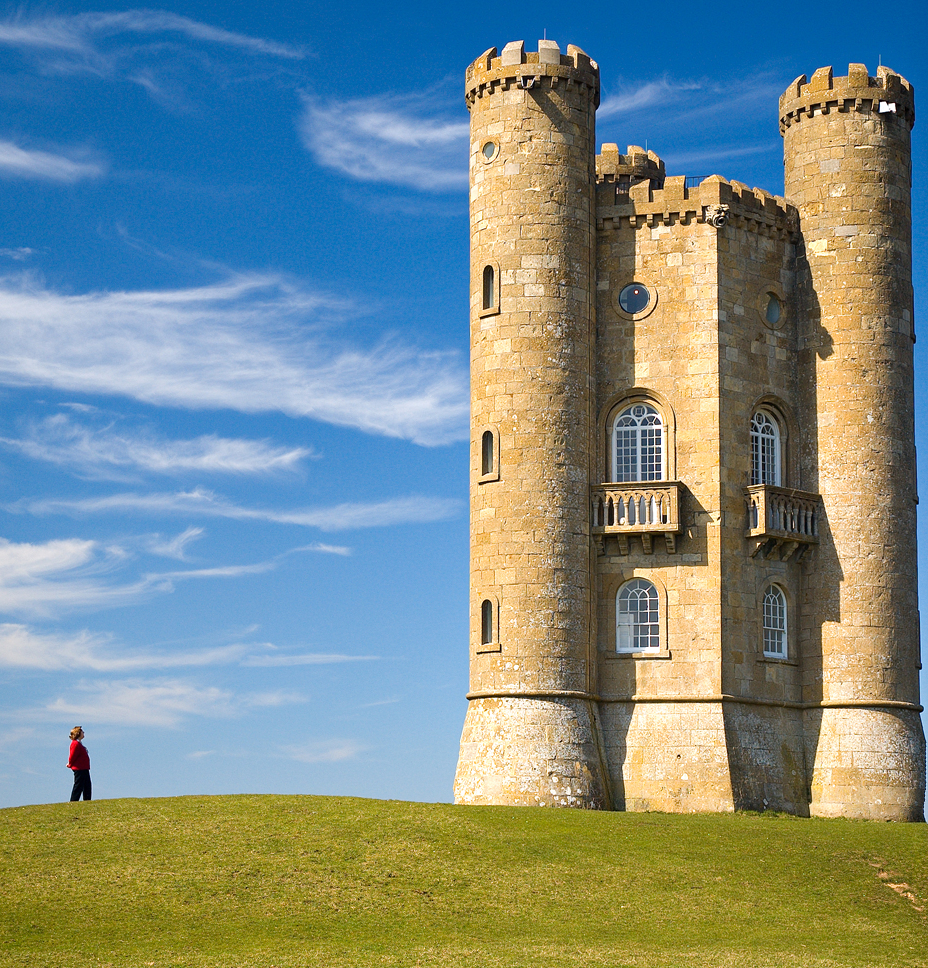

In [7]:
show_pnm(f'./images/{image}_device2.pnm')